#Get Helper Functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-09-20 12:45:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-20 12:45:14 (97.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#Get Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


train_df=pd.read_csv("/content/Train.csv")
val_df=pd.read_csv("/content/Val.csv")
test_df=pd.read_csv("/content/Test.csv")
train_df.tail()

,Work Steps,Actions,CATEGORY
13173,ANNUNCIATOR BLEED 1 AND 2 ANNUNCIATORBAR LIGHT...,. \n\nANNUNCIATOR RELAMPED BLEED 1 & 2 ANNUNCI...,COCKPIT LIGHT/PUSHBUTTON
13174,#1 ENG LOW OIL / LOTO INSTALLED,. \n\nADDED 3 QUARTS TO E1 IAW EMB 145 AMM 12-...,OIL SERVICE
13175,SCREW MISSING FROM PANEL ABOVE F/O CLOCK / LOT...,. \n\nFOUND AND REINSTALLED SCREW ON MAIN PANE...,MISSING/LOOSE SCREW
13176,MISSING ONE SEAT BELT EXTENDER / LOTO DEVICE I...,. \n\nREPLACED SEAT BELT EXTENSION AS REQUIRED...,PAX-SEAT BELT EXTENDER
13177,LOUD NOISE IN LAV / LOTO INSTALLED,. \n\nRESECURED LOOSE TOILET GASPER LINE FILTE...,AIR DISTRIBUTION


In [3]:
#Shuffle Training Dataframe
train_df_shuffled=train_df.sample(frac=1, random_state=42)
train_df_shuffled

,Work Steps,Actions,CATEGORY
11121,BOTH PORTABLE O2 BOTTLES IN CABIN DEPLETED / L...,. \n\nSERVICED BOTH PORTABLES O2 BOTTLES IAW E...,PORTABLE O2
10507,ENGINE 2 HUNG START,. \n\nPREFORMED ENG START IRW EMB 145 AMM 20-4...,ENGINE STARTING
3013,FO`S MFD KNOB IS UNABLE OR DIFFICULT TO SELECT,. \n\nR/R FO MFD BEZEL IAW EMB 145 AMM 34-22-0...,DU/PFD/MFD
4091,FO PTT BUTTON PLACARD MISSING / LOTO INSTALLED,. \n\nINSTALLED FOS PTT PLACARD IRT EMB 145 AM...,PLACARD
2348,SEAT 18C READING LIGHT INOP / LOTO INSTALLED,. \n\nLIGHT RELAMP 18C READING LITE IAW EMB 14...,INTERIOR LIGHT
...,...,...,...
11964,18C ARMREST BROKE / LOTO INSTALLED,. \n\n18 C REMOVED AND REPLACED 18 C ARMREST I...,PAX SEAT
5191,GPWS ON APPROACH DURING VMC CONDTIONS AT 2700 ...,. \n\nDEFERRED PER MEL 34-31-00-3. INOP AND CA...,EGPWS/WINDSHEAR/TERR
5390,SEAT BELT SIGN INOP 21 C AND D / LOTO INSTALLED,. \n\n21 C AND D SEAT BELT R/R SET BELT SIGN A...,INTERIOR LIGHT
860,E1 FUEL IMP BYPASS ON TAXI INTO GATE,. \n\nCLEANED CANNON PLUG ON FPMU FILTRATION I...,ENG FUEL IMP BYPASS


In [4]:
#get shape
train_df.shape, val_df.shape, test_df.shape

((13178, 3), (355, 3), (670, 3))

In [5]:
#remove nans
train_df= train_df.fillna(' ')

In [6]:
train_df.head()

,Work Steps,Actions,CATEGORY
0,"LARGE QTY OF FOD IN THE WHEEL WELLS, FLAP TRAC...",. \n\nREMOVED FOD AND INSPECTED AREA FOR DAMAG...,TIRE CUT/PUNCTURE
1,PARKING BREAK LIGHT BURNT OUT / LOTO DEVICE IN...,. \n\nPARKING BRAKE LIGHT RELAMPED BRAKE ON LI...,COCKPIT LIGHT/PUSHBUTTON
2,BUG WASH REQUIRED FOR WIND SCREEN / LOTO INSTA...,. \n\nWIND SHEILD CLEANED BY OPS AS REQUIRED. ...,PAPERWORK
3,MISSING F/O GND SPD BUTTON ON THE GFRC / LOTO ...,. \n\nR/R FO RA CONTROLLER IAW E145AMM 34-61-0...,COCKPIT EQUIP/INTERIOR
4,REQUIRED GALLEY CART PLACARD MISSING / LOTO DE...,. \n\nINSPECTED AND FOUND TO E145-2530-2021-00...,PLACARD


In [7]:
train_df.columns=train_df.columns.str.lower().str.replace(' ', '_')
test_df.columns=test_df.columns.str.lower().str.replace(' ', '_')
val_df.columns=val_df.columns.str.lower().str.replace(' ', '_')
train_df.columns

Index(['work_steps', 'actions', 'category_'], dtype='object')

In [8]:
train_df=train_df.rename(columns={"work_steps":"worksteps", "actions":"actions","category_":"category"})
val_df=val_df.rename(columns={"work_steps":"worksteps", "actions":"actions","category_":"category"})
test_df=test_df.rename(columns={"work_steps":"worksteps", "actions":"actions","category_":"category"})
val_df.head()

,worksteps,actions,category
0,WINDOW SHADE 18D STUCK THREE QUARTERS OF THE W...,. \n\nDEFERED PER NEF 25-90-17-1 PLACARD INSTA...,CABIN INTERIOR
1,PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LO...,. \n\nDEFERED PER MEL 25-22-00-3 LOWER PANEL S...,PSU
2,LIGHT COVER ON 10A UNSECURED / LOTTO INSTALLED,. \n\nRE-INSTALLED READING LIGHT COVER AT 10A ...,INTERIOR LIGHT
3,WINDOW SHADE AT SEAT 1A WILL NOT OPEN,. \n\nR/R WINDOW REVEAL ASSY IAW EMB 145 AMM 2...,CABIN INTERIOR
4,MULTIPLE OVERHEAD PANEL BACKLIGHTING INOP / LO...,. \n\nLP 1019302 PERFORMED OPERATIONAL CHECK O...,COCKPIT LIGHT/PUSHBUTTON


In [9]:
#How many values of each category?
train_df.category.value_counts()

PAX SEAT                    557
COCKPIT LIGHT/PUSHBUTTON    537
COCKPIT EQUIP/INTERIOR      428
EXTERIOR LIGHT              408
CREW SEAT                   366
                           ... 
FLIGHT CONTROLS               1
RVSM                          1
MX INDUCED                    1
PAX INDUCED                   1
AIR DISTRIBUTION              1
Name: category, Length: 244, dtype: int64

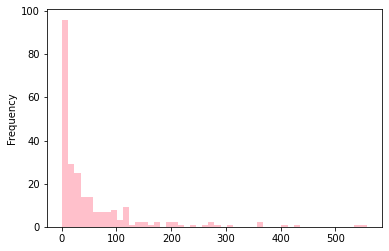

In [10]:
#Lets check the distribution
train_df.category.value_counts().plot.hist(bins=50, color="pink");

##Get the list of worksteps sentences

In [11]:
#drop a category not found in the training dataset for label encoder
i=val_df[(val_df["category"]=='AIR DISTRIBUTION ')].index
val_df=val_df.drop(i)

In [12]:
#convert worksteps text lines into lists
train_worksteps=train_df.worksteps.tolist()
val_worksteps=val_df.worksteps.tolist()
test_worksteps=test_df.worksteps.tolist()
len(train_worksteps), len(val_worksteps),len(test_worksteps) 


(13178, 355, 670)

In [13]:
#view 5 lines of training worksteps
train_worksteps[:5]

['LARGE QTY OF FOD IN THE WHEEL WELLS, FLAP TRACKS, AILERONS, AND LANDING GEAR / LOTO INSTALLED',
 'PARKING BREAK LIGHT BURNT OUT / LOTO DEVICE INSTALLED',
 'BUG WASH REQUIRED FOR WIND SCREEN / LOTO INSTALLED',
 'MISSING F/O GND SPD BUTTON ON THE GFRC / LOTO DEVICE INSTALLED',
 'REQUIRED GALLEY CART PLACARD MISSING / LOTO DEVICE INSTALLED']

#Make Numeric Labels 

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False, handle_unknown="ignore")#we want non-sparse matrix because tensorflow is not compatible with sparse datatype
train_labels_one_hot=one_hot_encoder.fit_transform(train_df["category"].to_numpy().reshape(-1,1))#fit encode structure to our dataframe so we dont need it again in the val's table
val_labels_one_hot=one_hot_encoder.transform(val_df["category"].to_numpy().reshape(-1,1))

In [15]:
#check what the one hot encoded looks like
val_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Label Encode Labels

In [16]:
#Extract labels ("category" clumns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df["category"].to_numpy())
val_labels_encoded=label_encoder.transform(val_df["category"].to_numpy())
#view trhe train label encoded
val_labels_encoded.shape

(355,)

In [17]:
val_labels_one_hot.shape

(355, 244)

#Modeling

### Model 0: Naive Bayes on worksteps

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create a pipeline
model_0=Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
    ])
#Fit the pipeline to the training data
model_0.fit(X=train_worksteps,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [19]:
#evaluate baseline model on validation dataset
model_0.score(X=val_worksteps,
              y=val_labels_encoded)

0.7774647887323943

In [20]:
#Make prediction using our baseline model
baseline_preds=model_0.predict(val_worksteps)
baseline_preds[:10]

array([ 41, 188, 188,  41,  53,  52,  41,  62, 102, 142])

In [21]:
from helper_functions import calculate_results

In [22]:
#calculate baseline results
baseline_results=calculate_results(y_true=val_labels_encoded,
                                   y_pred=baseline_preds)
baseline_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 77.74647887323944,
 'precision': 0.730848807829422,
 'recall': 0.7774647887323943,
 'f1': 0.7362519936471653}

##Get the list of action sentences

In [23]:
train_df.head()

,worksteps,actions,category
0,"LARGE QTY OF FOD IN THE WHEEL WELLS, FLAP TRAC...",. \n\nREMOVED FOD AND INSPECTED AREA FOR DAMAG...,TIRE CUT/PUNCTURE
1,PARKING BREAK LIGHT BURNT OUT / LOTO DEVICE IN...,. \n\nPARKING BRAKE LIGHT RELAMPED BRAKE ON LI...,COCKPIT LIGHT/PUSHBUTTON
2,BUG WASH REQUIRED FOR WIND SCREEN / LOTO INSTA...,. \n\nWIND SHEILD CLEANED BY OPS AS REQUIRED. ...,PAPERWORK
3,MISSING F/O GND SPD BUTTON ON THE GFRC / LOTO ...,. \n\nR/R FO RA CONTROLLER IAW E145AMM 34-61-0...,COCKPIT EQUIP/INTERIOR
4,REQUIRED GALLEY CART PLACARD MISSING / LOTO DE...,. \n\nINSPECTED AND FOUND TO E145-2530-2021-00...,PLACARD


In [24]:


#convert actions text lines into lists
train_actions=train_df.actions.tolist()
val_actions=val_df.actions.tolist()
test_actions=test_df.actions.tolist()
len(train_actions), len(val_actions),len(test_actions) 


(13178, 355, 670)

In [25]:
#view 5 lines of training actions
train_actions[:5]

['. \n\nREMOVED FOD AND INSPECTED AREA FOR DAMAGE, NO FAULTS NOTED AT THIS TIME, AIRCRAFT RETURNED TO SERVICE / LOTO DEVICE REMOVED AND STOWED AS REQ',
 '. \n\nPARKING BRAKE LIGHT RELAMPED BRAKE ON LIGHT IAW EMB 145XR MM 20-13-04 / LOTO REM',
 '. \n\nWIND SHEILD CLEANED BY OPS AS REQUIRED. / LOTO REMOVED AND STOWED',
 '. \n\nR/R FO RA CONTROLLER IAW E145AMM 34-61-02 OPS CK SAT / REMOVED AND STOWED LOTO AS REQUIRED',
 '. \n\nINSPECTED AND FOUND TO E145-2530-2021-001 HAS NOT BEEN COMPLIED WITH. NO PLACARD REQUIRED. / LOTO REMOVED AND STOWED LOTO AS REQ`D.']

 ### Model 1: Using actions

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create a pipeline
model_1=Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
    ])
#Fit the pipeline to the training data
model_1.fit(X=train_actions,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
#evaluate baseline model on validation dataset
model_1.score(X=val_worksteps,
              y=val_labels_encoded)

0.7436619718309859

In [28]:
#Make prediction using our baseline model
model_1_preds=model_1.predict(val_worksteps)
model_1_preds[:10]

array([ 41, 188, 188,  41,  53,  52, 142,  62, 102, 142])

In [29]:
model_1_results=calculate_results(y_true=val_labels_encoded,
                                   y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 74.36619718309859,
 'precision': 0.72395171861574,
 'recall': 0.7436619718309859,
 'f1': 0.7056063618418784}

## Prepare our data for deep modelling
We will
1. Create Vectorization layer
2. Create embedding layer

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [31]:
 #How long is each worksteps sentences on average
 sent_lens=[len(sentence.split()) for sentence in train_worksteps]
 avg_sent_len=np.mean(sent_lens)
 avg_sent_len

11.703445135832448

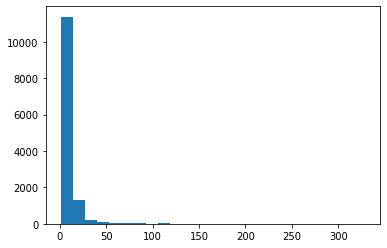

In [32]:
#Let's view the distribution
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=25);

In [33]:
# How long of a sentence length convers 95% of examples?
output_seq_len=int(np.percentile(sent_lens, 99))
output_seq_len

73

In [34]:
#maximum sequence length in the training set
max(sent_lens)

329

### Create Text Vectorizer Layer

We want to make a layer that maps our text to numbers

In [35]:
#create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer=TextVectorization(max_tokens=30000, #number of words in vocab
                                  output_sequence_length=output_seq_len, #desired output length of vectorized sequences
                                  )

In [36]:
#fit (adapt) textvectorizer to training sentences

text_vectorizer.adapt(train_worksteps)

In [37]:
# Test out text vectorizer on random sentences
import random
target_sentence=random.choice(train_worksteps)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text:{len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
SPS ADVANCE EICAS MESSAGE ON START UP

Length of text:7

Vectorized text: [[254 738  15  27   4  55  53   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]


In [38]:
#how many words in our training vocabulary
vocab =text_vectorizer.get_vocabulary()
print(f"Number of words in our vocab: {len(vocab)} ")
print(f"5 Most common words in the vocab:{vocab[:5]} ")
print(f"5 least common words in the vocab: {vocab[-5:]}")

Number of words in our vocab: 6666 
5 Most common words in the vocab:['', '[UNK]', 'loto', 'installed', 'on'] 
5 least common words in the vocab: ['0046422', '0044673', '0041', '002', '000']


In [39]:
#Det the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 30000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 73,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Create custom text embedding

So the text vectorizer (tokenizer) maps the words into numbers but the embedding maps the relationships between tokens and can be learned. 

In [40]:
#Create token embedding layer
token_embed=layers.Embedding(input_dim=len(vocab),
                             output_dim=128, #Note: different embedding sizes result in drastically different number of parameters to train
                             mask_zero=True, #use masking to handle variable sequence lengths (save space)
                             name="Token_Embedding"
)


In [41]:
from matplotlib import text
#show example embedding
print(f"sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"sentence after vectorization(before embedding:\n {vectorized_sentence}\n")
embedded_sentence=token_embed(vectorized_sentence)
print(f"sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape:\n{embedded_sentence.shape}")

sentence before vectorization:
 SPS ADVANCE EICAS MESSAGE ON START UP

sentence after vectorization(before embedding:
 [[254 738  15  27   4  55  53   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]

sentence after embedding:
 [[[-0.02504611  0.02465155 -0.04571403 ... -0.04571367 -0.04190396
    0.03140989]
  [ 0.03715446 -0.02981641  0.03070721 ... -0.04821895  0.02660756
   -0.02868505]
  [ 0.00741644 -0.01362655  0.04278649 ... -0.00432213 -0.02387438
    0.01232495]
  ...
  [ 0.00677463 -0.04140496 -0.03627934 ...  0.02065923  0.03214185
   -0.01057565]
  [ 0.00677463 -0.04140496 -0.03627934 ...  0.02065923  0.03214185
   -0.01057565]
  [ 0.00677463 -0.04140496 -0.03627934 ...  0.02065923  0.03214185
   -0.01057565]]]

Embedded sentence shape:
(1, 73, 128)


### Creating Datasets for Worksteps sentences
We are going to setup our data to run as fast as possible with the Tensorflow tf.data API, many of the steps here are discussed at length in these two resources:
- https://www.tensorflow.org/guide/data_performance
- https://www.tensorflow.org/guide/data_performance


In [42]:
#Turn our data into Tensorflow Datasets for Worksteps
train_dataset_worksteps=tf.data.Dataset.from_tensor_slices((train_worksteps, train_labels_one_hot))
valid_dataset_worksteps=tf.data.Dataset.from_tensor_slices((val_worksteps, val_labels_one_hot))

train_dataset_worksteps

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(244,), dtype=tf.float64, name=None))>

In [43]:
#Take the TensorSliceDatasets and turn them inot prefetched datasets
train_dataset_worksteps=train_dataset_worksteps.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset_worksteps=valid_dataset_worksteps.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset_worksteps

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 244), dtype=tf.float64, name=None))>

### Model 2:  Conv1D for Worsteps with token embeddings

In [44]:
num_classes=244

In [45]:
#create 1D conv model to process sequebces
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs)#vectorize text inputs
token_embeddings=token_embed(text_vectors)#embedded the tokens
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                padding="same",
                activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condensed the out put of our feature vector from our conv layer
outputs=layers.Dense(num_classes, activation="softmax")(x)
model_2=tf.keras.Model(inputs, outputs)

#Compile 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [46]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 73)               0         
 torization)                                                     
                                                                 
 Token_Embedding (Embedding)  (None, 73, 128)          853248    
                                                                 
 conv1d (Conv1D)             (None, 73, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 244)               15860 

In [47]:
#Fit the model
history_model_2=model_2.fit(train_dataset_worksteps,
                            epochs=10,
                            validation_data=valid_dataset_worksteps) #only validate on 10% of batches

Epoch 1/10
412/412 [==============================] - 15s 6ms/step - loss: 4.6240 - accuracy: 0.0581 - val_loss: 3.3884 - val_accuracy: 0.1915
Epoch 2/10
412/412 [==============================] - 2s 5ms/step - loss: 3.8194 - accuracy: 0.1606 - val_loss: 2.3502 - val_accuracy: 0.4085
Epoch 3/10
412/412 [==============================] - 2s 5ms/step - loss: 3.0263 - accuracy: 0.3380 - val_loss: 1.6800 - val_accuracy: 0.5887
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 2.4011 - accuracy: 0.4791 - val_loss: 1.2905 - val_accuracy: 0.7070
Epoch 5/10
412/412 [==============================] - 2s 5ms/step - loss: 1.9627 - accuracy: 0.5749 - val_loss: 1.0638 - val_accuracy: 0.7577
Epoch 6/10
412/412 [==============================] - 2s 5ms/step - loss: 1.6406 - accuracy: 0.6426 - val_loss: 0.9165 - val_accuracy: 0.7859
Epoch 7/10
412/412 [==============================] - 2s 5ms/step - loss: 1.3899 - accuracy: 0.6927 - val_loss: 0.8214 - val_accuracy: 0.8141
Epoch

In [48]:
#evaluate our model 1 on whole validation dataset
model_2.evaluate(valid_dataset_worksteps)

12/12 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.8479


[0.6939684152603149, 0.8478873372077942]

In [49]:
#make prediciton (our model provides prediciton probabilities for each class)
model_2_pred_probs=model_2.predict(valid_dataset_worksteps)
model_2_pred_probs, model_2_pred_probs.shape

(array([[4.1087419e-06, 4.1868375e-07, 3.7094687e-06, ..., 2.2440276e-05,
         1.0437591e-03, 1.2485323e-03],
        [8.0281528e-12, 1.8702641e-12, 1.1950055e-11, ..., 3.7073463e-08,
         1.3904757e-05, 1.3363054e-04],
        [9.7188579e-10, 1.0095687e-09, 1.7749296e-09, ..., 2.4037092e-07,
         3.4988010e-05, 4.4119899e-04],
        ...,
        [1.0185963e-11, 6.9364028e-11, 7.6899563e-12, ..., 9.2307585e-13,
         3.5127503e-08, 5.8249029e-08],
        [9.7788355e-09, 1.7719247e-08, 4.5120732e-08, ..., 3.7883699e-10,
         1.8867329e-06, 3.1805981e-04],
        [3.3612637e-12, 6.5228257e-12, 1.5165964e-11, ..., 2.0502551e-09,
         2.1717707e-10, 7.3745021e-08]], dtype=float32), (355, 244))

In [50]:
#convert pred probs to classes
model_2_preds=tf.argmax(model_2_pred_probs, axis=1) #returns the index where the maximum value occurs
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 41, 188, 142,  41,  53,  41, 203,  62, 102, 142])>

In [51]:
#Get Category names
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes, class_names[:10]

(244, array(['A/I PROBLEM-ENG', 'A/I PROBLEM-SYS', 'A/I PROBLEM-WING', 'ACARS',
        'ACCESS DOOR/PANEL', 'ACCESS PANEL', 'ADC PROBLEM', 'ADF', 'ADS-B',
        'AHRS'], dtype=object))

In [52]:
#calculate model_1 results
model_2_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 84.78873239436619,
 'precision': 0.8612997122520067,
 'recall': 0.847887323943662,
 'f1': 0.8489770313724762}

### Prepare Data for Actions Modeling

In [53]:
#Turn our data into Tensorflow Datasets for actions
train_dataset_actions=tf.data.Dataset.from_tensor_slices((train_actions, train_labels_one_hot))
valid_dataset_actions=tf.data.Dataset.from_tensor_slices((val_actions, val_labels_one_hot))

#Take the TensorSliceDatasets and turn them inot prefetched datasets
train_dataset_actions=train_dataset_actions.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset_actions=valid_dataset_actions.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset_actions


<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 244), dtype=tf.float64, name=None))>

### Model 3: Conv1D for Actions with token embeddings

In [54]:
#create 1D conv model to process sequebces
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs)#vectorize text inputs
token_embeddings=token_embed(text_vectors)#embedded the tokens
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                padding="same",
                activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condensed the out put of our feature vector from our conv layer
outputs=layers.Dense(num_classes, activation="softmax")(x)
model_3=tf.keras.Model(inputs, outputs)

#Compile 
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_model_3=model_3.fit(train_dataset_actions,
                            epochs=10,
                            validation_data=valid_dataset_actions) 

Epoch 1/10
412/412 [==============================] - 3s 6ms/step - loss: 4.2033 - accuracy: 0.1671 - val_loss: 2.2822 - val_accuracy: 0.5296
Epoch 2/10
412/412 [==============================] - 2s 5ms/step - loss: 2.8996 - accuracy: 0.4105 - val_loss: 1.4596 - val_accuracy: 0.6817
Epoch 3/10
412/412 [==============================] - 2s 5ms/step - loss: 2.3105 - accuracy: 0.5155 - val_loss: 1.2025 - val_accuracy: 0.7296
Epoch 4/10
412/412 [==============================] - 2s 5ms/step - loss: 1.9948 - accuracy: 0.5713 - val_loss: 1.0898 - val_accuracy: 0.7634
Epoch 5/10
412/412 [==============================] - 2s 5ms/step - loss: 1.7835 - accuracy: 0.6106 - val_loss: 1.0270 - val_accuracy: 0.7718
Epoch 6/10
412/412 [==============================] - 2s 5ms/step - loss: 1.6248 - accuracy: 0.6419 - val_loss: 0.9906 - val_accuracy: 0.7746
Epoch 7/10
412/412 [==============================] - 2s 5ms/step - loss: 1.4976 - accuracy: 0.6676 - val_loss: 0.9701 - val_accuracy: 0.7831
Epoch 

In [55]:
#evaluate our model 1 on whole validation dataset
model_3.evaluate(valid_dataset_actions)

12/12 [==============================] - 0s 4ms/step - loss: 0.9444 - accuracy: 0.7831


[0.9443871974945068, 0.783098578453064]

In [56]:
#make prediciton (our model provides prediciton probabilities for each class)
model_3_pred_probs=model_3.predict(valid_dataset_actions)
model_3_pred_probs, model_3_pred_probs.shape
#convert pred probs to classes
model_3_preds=tf.argmax(model_3_pred_probs, axis=1) #returns the index where the maximum value occurs
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 41, 174, 142,  41,  53,  41, 203,  62, 102,  53])>

In [57]:
#calculate model_3 results
model_3_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 78.30985915492957,
 'precision': 0.8178868097985319,
 'recall': 0.7830985915492957,
 'f1': 0.7935519134894184}

### Model 4: Combining Worksteps and Actions 

In [58]:
#1. Setup tokem inputs/model
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs)#vectorize text inputs
token_embeddings=token_embed(text_vectors)#embedded the tokens
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                padding="same",
                activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condensed the out put of our feature vector from our conv layer
outputs=layers.Dense(num_classes, activation="softmax")(x)
token_model_worksteps=tf.keras.Model(inputs, outputs)


#2. Setup char inputs/model
inputs=layers.Input(shape=(1,), dtype=tf.string)
text_vectors=text_vectorizer(inputs)#vectorize text inputs
token_embeddings=token_embed(text_vectors)#embedded the tokens
x=layers.Conv1D(filters=64,
                kernel_size=5,
                strides=1,
                padding="same",
                activation="relu")(token_embeddings)
x=layers.GlobalAveragePooling1D()(x) #condensed the out put of our feature vector from our conv layer
outputs=layers.Dense(num_classes, activation="softmax")(x)
token_model_actions=tf.keras.Model(inputs, outputs)

#3.Combine 1 and 2 with concatenate (Create hybird token embedding)
token_concat=layers.Concatenate(name="token_hybrid")([token_model_actions.output,
                                                                token_model_worksteps.output])

#4.Create output layers-adding in Dropout, discussed in section 4.2 of the paper
combined_dropout=layers.Dropout(0.5)(token_concat)
combined_dense=layers.Dense(128, activation="relu")(combined_dropout)
final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes, activation="softmax")(final_dropout)

#5.Construct model with char and token inputs
model_4=tf.keras.Model(inputs=[token_model_actions.input, token_model_worksteps.input],
                       outputs=output_layer,
                       name="model_4_token")


In [59]:
model_4.summary()

Model: "model_4_token"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 73)          0           ['input_3[0][0]',                
 ization)                                                         'input_4[0][0]']                
                                                                                                  
 Token_Embedding (Embedding)    (None, 73, 128)      853248      ['text_vectorization[

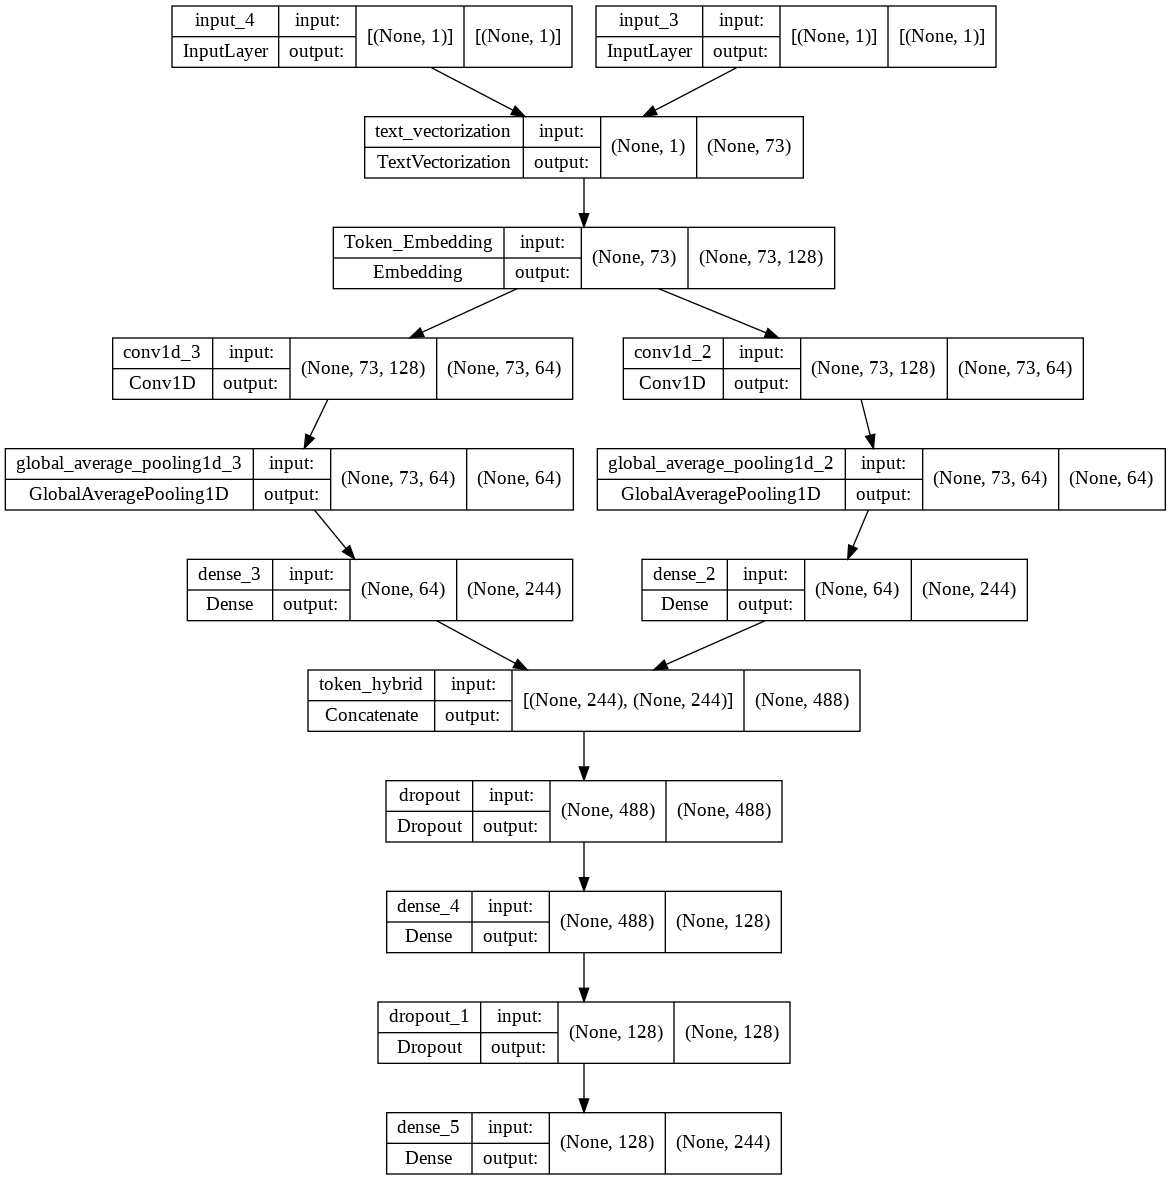

In [60]:
#plot hybrid token and character model
from keras.utils.vis_utils import plot_model
plot_model(model_4, show_shapes=True)

In [61]:
#compile model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Create dataset for our model

In [62]:
#combine chards and tokens into a dataset
train_worksteps_actions_data=tf.data.Dataset.from_tensor_slices((train_worksteps, train_actions)) #make data
train_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot) #make labels
train_dataset=tf.data.Dataset.zip((train_worksteps_actions_data, train_labels)) #combine them

#prefetch and batch train data
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [63]:
#combine chards and tokens into a dataset
val_worksteps_actions_data=tf.data.Dataset.from_tensor_slices((val_worksteps, val_actions)) #make data
val_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot) #make labels
val_dataset=tf.data.Dataset.zip((val_worksteps_actions_data, val_labels)) #combine them

#prefetch and batch train data
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Fitting the combined model


In [64]:
#Fit the model
history_model_4=model_4.fit(train_dataset,
                            epochs=30,
                            validation_data=val_dataset,
                            verbose=0) 

In [65]:
from helper_functions import plot_loss_curves

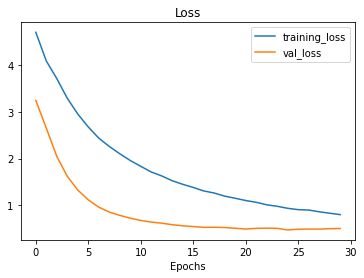

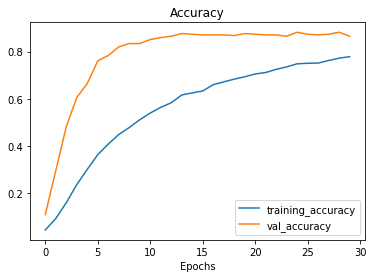

In [66]:
plot_loss_curves(history_model_4)

In [67]:
#Make predictions with the char token pos model
model_4_pred_probs=model_4.predict(val_dataset, verbose=1)
model_4_pred_probs
#convert pred probs to pred labels
model_4_preds=tf.argmax(model_4_pred_probs, axis=1)
model_4_preds[:10]


12/12 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 41,  41, 142,  41,  53,  41, 203,  62, 102, 142])>

In [68]:
#calcualte results of char token pos model
model_4_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_4_preds)
model_4_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 86.47887323943661,
 'precision': 0.8926049998348894,
 'recall': 0.8647887323943662,
 'f1': 0.8698850936677899}

## Compare Model Results

In [69]:
all_model_results=pd.DataFrame({"model_0_worksteps_naivebayes": baseline_results,
                                "model_1_actions_naivebayes": model_1_results,
                                "model_2_conv1_worksteps": model_2_results,
                                "model_3_conv_actions": model_4_results,
                                "model_4_hybrid": model_4_results})
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_worksteps_naivebayes,77.746479,0.730849,0.777465,0.736252
model_1_actions_naivebayes,74.366197,0.723952,0.743662,0.705606
model_2_conv1_worksteps,84.788732,0.861300,0.847887,0.848977
model_3_conv_actions,86.478873,0.892605,0.864789,0.869885
model_4_hybrid,86.478873,0.892605,0.864789,0.869885


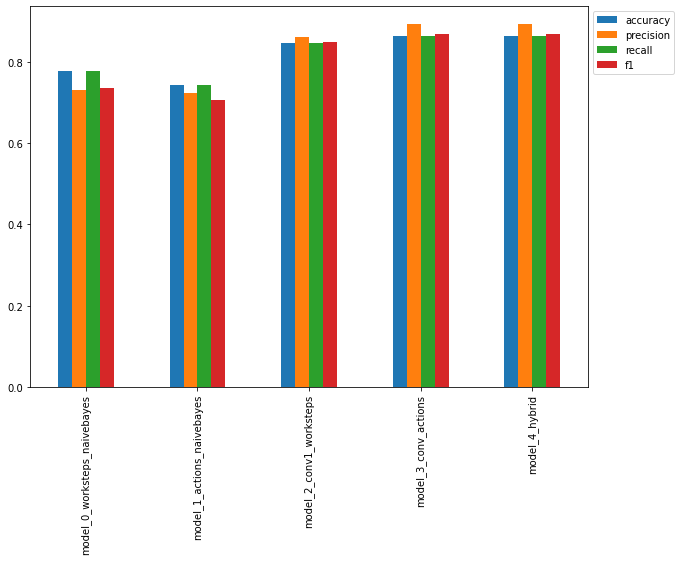

In [70]:
#Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"]=all_model_results["accuracy"]/100
#plot and compare all model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0));

### Save and load model

In [71]:
# Save the best performing model to SavedModdel format
model_4.save("pireps.model")

In [72]:
!zip -r /content/file.zip /content/pireps.model

from google.colab import files
files.download("/content/file.zip")

  adding: content/pireps.model/ (stored 0%)
  adding: content/pireps.model/keras_metadata.pb (deflated 91%)
  adding: content/pireps.model/variables/ (stored 0%)
  adding: content/pireps.model/variables/variables.index (deflated 67%)
  adding: content/pireps.model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/pireps.model/saved_model.pb (deflated 83%)
  adding: content/pireps.model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
#Load in best performing model
loaded_model=tf.keras.models.load_model("pireps.model")

In [74]:
#Make predictions with our load model on the validation set
loaded_pred_probs=loaded_model.predict(val_dataset)
loaded_preds=tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 41,  41, 142,  41,  53,  41, 203,  62, 102, 142])>

In [75]:
#calculate the results
loaded_model_results=calculate_results(y_true=val_labels_encoded,
                                       y_pred=loaded_preds)
loaded_model_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 86.47887323943661,
 'precision': 0.8926049998348894,
 'recall': 0.8647887323943662,
 'f1': 0.8698850936677899}

In [76]:
model_4_results==loaded_model_results

True

## Generate Predicition for each event

In [86]:
class_names=label_encoder.classes_

for i in range(10):
  prediction=tf.argmax(loaded_model.predict(val_dataset), axis=1)[i]
  predicted_label=class_names[prediction]
  print(val_df.worksteps[i][:50], ".....")
  print(val_df.actions[i][:50], ".....")
  print('Actual label: ' + val_df.category[i])
  print('Predicted label: ' + predicted_label + '\n')
  

WINDOW SHADE 18D STUCK THREE QUARTERS OF THE WAY C .....
. 

DEFERED PER NEF 25-90-17-1 PLACARD INSTALLED / .....
Actual label: CABIN INTERIOR
Predicted label: CABIN INTERIOR

PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LOTO I .....
. 

DEFERED PER MEL 25-22-00-3 LOWER PANEL SECURED .....
Actual label: PSU
Predicted label: CABIN INTERIOR

LIGHT COVER ON 10A UNSECURED / LOTTO INSTALLED .....
. 

RE-INSTALLED READING LIGHT COVER AT 10A IAW EM .....
Actual label: INTERIOR LIGHT
Predicted label: INTERIOR LIGHT

WINDOW SHADE AT SEAT 1A WILL NOT OPEN .....
. 

R/R WINDOW REVEAL ASSY IAW EMB 145 AMM 25-23-0 .....
Actual label: CABIN INTERIOR
Predicted label: CABIN INTERIOR

MULTIPLE OVERHEAD PANEL BACKLIGHTING INOP / LOTO D .....
. 

LP 1019302 PERFORMED OPERATIONAL CHECK OF OVER .....
Actual label: COCKPIT LIGHT/PUSHBUTTON
Predicted label: COCKPIT LIGHT/PUSHBUTTON

RT SIDE EXIT ROW HANDLE COVER FALLING OFF / LOTO I .....
. 

RESECURED EXIT ROW DOOR HANDLE COVER IRT EMB 1 .....
Actual label: 

In [196]:
#Unbatch or unravel the val dataset
val_labels=[]
for worksteps_actions, labels in val_dataset.unbatch():
  val_labels.append(labels.numpy().argmax())
val_labels[:10]


[41, 203, 142, 41, 53, 81, 203, 62, 102, 142]

In [197]:
#Get Category names
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes, class_names[:10]

(244, array(['A/I PROBLEM-ENG', 'A/I PROBLEM-SYS', 'A/I PROBLEM-WING', 'ACARS',
        'ACCESS DOOR/PANEL', 'ACCESS PANEL', 'ADC PROBLEM', 'ADF', 'ADS-B',
        'AHRS'], dtype=object))

In [200]:
val_df

,worksteps,actions,category
0,WINDOW SHADE 18D STUCK THREE QUARTERS OF THE W...,. \n\nDEFERED PER NEF 25-90-17-1 PLACARD INSTA...,CABIN INTERIOR
1,PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LO...,. \n\nDEFERED PER MEL 25-22-00-3 LOWER PANEL S...,PSU
2,LIGHT COVER ON 10A UNSECURED / LOTTO INSTALLED,. \n\nRE-INSTALLED READING LIGHT COVER AT 10A ...,INTERIOR LIGHT
3,WINDOW SHADE AT SEAT 1A WILL NOT OPEN,. \n\nR/R WINDOW REVEAL ASSY IAW EMB 145 AMM 2...,CABIN INTERIOR
4,MULTIPLE OVERHEAD PANEL BACKLIGHTING INOP / LO...,. \n\nLP 1019302 PERFORMED OPERATIONAL CHECK O...,COCKPIT LIGHT/PUSHBUTTON
...,...,...,...
350,LH EMERGENCY EXIT HANDLE COVER LOOSE / LOTO IN...,. \n\nCOVER RESECURED LH EMER EXIT ACCESS PANE...,EMERGENCY EQUIPMENT
351,PAPER TOWEL HOLDER LATCH NOT WORKING / LOTO IN...,". \n\nRESECURED PAPER TOWEL LATCH , IN REF EMB...",LAV INTERIOR
352,PACK #1 PUSH BUTTON LIGHT INOP / LOTO INSTALLED,. \n\nR&R #1 PACK PUSH BUTTON IAW EMB 145 AMM ...,COCKPIT LIGHT/PUSHBUTTON
353,ANNUNCIATOR CALL LIGHTS POSSIBLE MISSING COVER...,". \n\nR&R ANNUNCIATOR CALL LIGHTS AT ROW 7, 8,...",FA CALL SYS


In [209]:
#let get the category for test prediction
val_pred_classes=[label_encoder.classes_[pred] for pred in loaded_preds ]
val_pred_classes[:10]

['CABIN INTERIOR',
 'CABIN INTERIOR',
 'INTERIOR LIGHT',
 'CABIN INTERIOR',
 'COCKPIT LIGHT/PUSHBUTTON',
 'CABIN INTERIOR',
 'PSU',
 'CREW SEAT',
 'EXTERIOR LIGHT',
 'INTERIOR LIGHT']

In [212]:
#Add prediction to val_df
val_df["prediction"]=val_pred_classes
val_df["prediction_probability"]=tf.reduce_max(loaded_pred_probs, axis=1).numpy()
val_df["correct"]=val_df["prediction"]==val_df["category"]

In [222]:
val_df[:20]

,worksteps,actions,category,prediction,prediction_probability,correct
0,WINDOW SHADE 18D STUCK THREE QUARTERS OF THE W...,. \n\nDEFERED PER NEF 25-90-17-1 PLACARD INSTA...,CABIN INTERIOR,CABIN INTERIOR,0.826329,True
1,PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LO...,. \n\nDEFERED PER MEL 25-22-00-3 LOWER PANEL S...,PSU,CABIN INTERIOR,0.836415,False
2,LIGHT COVER ON 10A UNSECURED / LOTTO INSTALLED,. \n\nRE-INSTALLED READING LIGHT COVER AT 10A ...,INTERIOR LIGHT,INTERIOR LIGHT,0.985199,True
3,WINDOW SHADE AT SEAT 1A WILL NOT OPEN,. \n\nR/R WINDOW REVEAL ASSY IAW EMB 145 AMM 2...,CABIN INTERIOR,CABIN INTERIOR,0.968791,True
4,MULTIPLE OVERHEAD PANEL BACKLIGHTING INOP / LO...,. \n\nLP 1019302 PERFORMED OPERATIONAL CHECK O...,COCKPIT LIGHT/PUSHBUTTON,COCKPIT LIGHT/PUSHBUTTON,0.989665,True
5,RT SIDE EXIT ROW HANDLE COVER FALLING OFF / LO...,. \n\nRESECURED EXIT ROW DOOR HANDLE COVER IRT...,EMERGENCY EQUIPMENT,CABIN INTERIOR,0.807960,False
6,ROW 5 PSU FELL / LOTO INSTALLED,. \n\nRESECURED PSU UNIT ON ROW 5 IAW E145 25-...,PSU,PSU,0.924171,True
7,CAPT SEAT ADJ HANDLE BROKEN / LOTO INSTALLED,. \n\nREINSTALLED CAPT SEAT ADJ HANDLE IAW ZOD...,CREW SEAT,CREW SEAT,0.987092,True
8,LEFT LANDING LIGHT INOP / LOTO INSTALLED,. \n\nR&R LH LANDING LIGHT IAW EMB 145 AMM 33-...,EXTERIOR LIGHT,EXTERIOR LIGHT,0.988828,True
9,CEILING LIGHTS INOP 3A & 21A / LOTO INSTALLED,. \n\nCEILING LTS R/R BULBS OPS CK GOOD REF EM...,INTERIOR LIGHT,INTERIOR LIGHT,0.983075,True


In [224]:
#20 Most Wrong
top_20_wrong=val_df[val_df["correct"]==False].sort_values("prediction_probability", ascending=False)
top_20_wrong[:20]

,worksteps,actions,category,prediction,prediction_probability,correct
115,FO ESCAPE ROPE DOOR WON`T CLOSE / LOTO INSTALLED,. \n\nSECURED FO ESCAPE ROPE DOOR IAW EMB 145 ...,COCKPIT EQUIP/INTERIOR,EMERGENCY EQUIPMENT,0.974605,False
145,FIRST AID KIT OPENED,. \n\nFAK REMOVED AND REPLACED KAD AS REQUIRED...,OTHER,EMERGENCY EQUIPMENT,0.922560,False
73,PILOT CHART HOLDER IS LOOSE / LOTO INSTALLED,. \n\nREPLACED MISSING SCREW ON PILOT CHART HO...,CREW SEAT,COCKPIT EQUIP/INTERIOR,0.919220,False
106,CABIN FIRE EXTINGUISHER HALON SEAL MISSING.,. \n\nINSPECTED AND RESEALED CABIN HALON FIRE ...,EMERGENCY EQUIPMENT,FIRE EXTINGUISHING,0.908057,False
257,FLIGHT ATTENDANT SAFETY DEMO COMP DOOR HARD TO...,. \n\nADJUSTED FA SAFTEY DEMO COMPARTMENT DOOR...,DEMO EQUIP,EMERGENCY EQUIPMENT,0.886107,False
246,"LAV OVERSERVICED, BLUE JUICE ON CARPET / LOTO ...",. \n\nPERFORMED LAV OVERSERVICE INSPECTION IAW...,CREW/OPS,LAV INTERIOR,0.872660,False
173,LAV LIGHT COVER ABOVE TOILET UNLATCHED.,. \n\nSECURED LAV LIGHT COVER ABOVE TOILET. RE...,LAV INTERIOR,INTERIOR LIGHT,0.853856,False
229,SEATBELT 22D MISSING / LOTO INSTALLED,. \n\nREPLACED SEAT 22D SEATBELT IAW EMB 145 A...,MISSING/LOOSE HARDWARE,PAX SEAT,0.851927,False
263,LAV CALL CHIME INOP / LOTO INSTALLED,". \n\nPERFORMED OPS CHECK OF LAV. CALL CHIME, ...",INTERIOR LIGHT,FA CALL SYS,0.848862,False
1,PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LO...,. \n\nDEFERED PER MEL 25-22-00-3 LOWER PANEL S...,PSU,CABIN INTERIOR,0.836415,False


In [225]:
top_20_wrong.category.value_counts()

COCKPIT EQUIP/INTERIOR    5
INTERIOR LIGHT            5
OTHER                     4
EMERGENCY EQUIPMENT       4
MISSING/LOOSE HARDWARE    4
EMERGENCY LIGHT           3
PSU                       3
CARGO INTERIOR            2
CABIN INTERIOR            2
PAX SEAT                  2
GALLEY                    2
LAV INTERIOR              2
EXTERIOR LIGHT            2
PLACARD                   1
CREW/OPS                  1
MISSING/LOOSE SCREW       1
COFFEE POT/MAKER          1
DEMO EQUIP                1
CREW SEAT                 1
BRIEFING CARDS            1
CHECKLIST                 1
Name: category, dtype: int64

In [229]:
import os  
os.makedirs('/content/preds', exist_ok=True)  
val_df.to_csv('/content/preds/preds.csv') 

,worksteps,actions,category,prediction,prediction_probability,correct
0,WINDOW SHADE 18D STUCK THREE QUARTERS OF THE W...,. \n\nDEFERED PER NEF 25-90-17-1 PLACARD INSTA...,CABIN INTERIOR,CABIN INTERIOR,0.826329,True
1,PANEL ABOVE SEAT 3C AND D HAS FALLEN OFF. / LO...,. \n\nDEFERED PER MEL 25-22-00-3 LOWER PANEL S...,PSU,CABIN INTERIOR,0.836415,False
2,LIGHT COVER ON 10A UNSECURED / LOTTO INSTALLED,. \n\nRE-INSTALLED READING LIGHT COVER AT 10A ...,INTERIOR LIGHT,INTERIOR LIGHT,0.985199,True
3,WINDOW SHADE AT SEAT 1A WILL NOT OPEN,. \n\nR/R WINDOW REVEAL ASSY IAW EMB 145 AMM 2...,CABIN INTERIOR,CABIN INTERIOR,0.968791,True
4,MULTIPLE OVERHEAD PANEL BACKLIGHTING INOP / LO...,. \n\nLP 1019302 PERFORMED OPERATIONAL CHECK O...,COCKPIT LIGHT/PUSHBUTTON,COCKPIT LIGHT/PUSHBUTTON,0.989665,True


In [235]:
sample_worksteps="Panel above seat and has fallen off"
sample_preds=loaded_model.predict([sample_worksteps])


ValueError: ignored